# Decision Tree en agosto

En este notebook vamos a ver cómo se comportan los DecisionTree con el dataset de digits. Vamos a probar Decision Tree usando el dataset normal, usando los RFF que vienen por defecto, usando la tangente en vez del coseno, también vamos a probar el Nÿstroem

#### Lectura del dataset

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from time import time
import math

# Import datasets, classifiers and performance metrics
from sklearn import datasets, pipeline
#from sklearn import svm
from sklearn.kernel_approximation import (RBFSampler,
                                          Nystroem)
#from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.neural_network import MLPClassifier

In [2]:
from ribes_tan_RFFSampler import ribes_tan_RFFSampler

In [3]:
# The digits dataset
digits = datasets.load_digits()

In [4]:
data = digits.data
target = digits.target
N = data.shape[0]
prop_train = 1 / 2
N_train = math.ceil(N * prop_train)
N_test = N - N_train

In [5]:
data /= 16
data -= data.mean(axis = 0)

In [6]:
data_train = data[:N_train]
data_test = data[N_train:]

target_train = target[:N_train]
target_test = target[N_train:]

# Decision Tree normal

In [7]:
dtc = DecisionTreeClassifier()

In [8]:
dtc.fit(data_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
train_score_normal_dt = dtc.score(data_train, target_train)
test_score_nomal_dt = dtc.score(data_test, target_test)

In [10]:
train_score_normal_dt, test_score_nomal_dt

(1.0, 0.7594654788418709)

# Decision Tree con RBFSampler

In [11]:
feature_map_fourier = RBFSampler(gamma=.2, random_state=1)
feature_map_nystroem = Nystroem(gamma=.2, random_state=1)

In [12]:
dtc_rbf = pipeline.Pipeline([("feature_map", feature_map_fourier),
                             ("ctf", DecisionTreeClassifier())])

In [13]:
D = 500

In [14]:
dtc_rbf.set_params(feature_map__n_components=D)

Pipeline(memory=None,
     steps=[('feature_map', RBFSampler(gamma=0.2, n_components=500, random_state=1)), ('ctf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [15]:
dtc_rbf.fit(data_train, target_train)

Pipeline(memory=None,
     steps=[('feature_map', RBFSampler(gamma=0.2, n_components=500, random_state=1)), ('ctf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [16]:
train_score = dtc_rbf.score(data_train, target_train)
test_score = dtc_rbf.score(data_test, target_test)

In [17]:
train_score, test_score

(1.0, 0.6458797327394209)

# Decision Tree con Nystroem

In [18]:
dtc_nys = pipeline.Pipeline([("feature_map", feature_map_nystroem),
                             ("ctf", DecisionTreeClassifier())])

In [19]:
dtc_nys.set_params(feature_map__n_components=D)

Pipeline(memory=None,
     steps=[('feature_map', Nystroem(coef0=None, degree=None, gamma=0.2, kernel='rbf', kernel_params=None,
     n_components=500, random_state=1)), ('ctf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impur...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [20]:
dtc_nys.fit(data_train, target_train)

Pipeline(memory=None,
     steps=[('feature_map', Nystroem(coef0=None, degree=None, gamma=0.2, kernel='rbf', kernel_params=None,
     n_components=500, random_state=1)), ('ctf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impur...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [21]:
train_score = dtc_nys.score(data_train, target_train)
test_score = dtc_nys.score(data_test, target_test)

In [22]:
train_score, test_score

(1.0, 0.6904231625835189)

# Regresión Logística

In [23]:
logit = LogisticRegression( C = 1e30, multi_class = 'multinomial', 
                           solver = 'lbfgs')

In [24]:
logit.fit(data_train, target_train)

LogisticRegression(C=1e+30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
train_score_logit = logit.score(data_train, target_train)
test_score_logit = logit.score(data_test, target_test)

In [26]:
train_score_logit, test_score_logit

(1.0, 0.920935412026726)

# Decision Tree con RFF usando la tangente

In [27]:
feature_map_tan = ribes_tan_RFFSampler(gamma=.2, random_state=1)

In [28]:
dtc_rbf_tan = pipeline.Pipeline([("feature_map", feature_map_tan),
                                 ("ctf", DecisionTreeClassifier())])

In [29]:
dtc_rbf_tan.set_params(feature_map__n_components=D)

Pipeline(memory=None,
     steps=[('feature_map', ribes_tan_RFFSampler(gamma=0.2, n_components=500, random_state=1)), ('ctf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [30]:
dtc_rbf_tan.fit(data_train, target_train)

Pipeline(memory=None,
     steps=[('feature_map', ribes_tan_RFFSampler(gamma=0.2, n_components=500, random_state=1)), ('ctf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [31]:
train_score = dtc_rbf_tan.score(data_train, target_train)
test_score = dtc_rbf_tan.score(data_test, target_test)

In [32]:
train_score, test_score

(1.0, 0.30957683741648107)

# Incrementando la cantidad de features

In [33]:
sample_sizes = 30 * np.arange(1, 20)

In [34]:
normal_fourier_scores = []
tan_fourier_scores = []
nystroem_scores = []

In [35]:
for D in sample_sizes:
    dtc_rbf.set_params(feature_map__n_components=D)
    dtc_rbf_tan.set_params(feature_map__n_components=D)
    dtc_nys.set_params(feature_map__n_components=D)
    
    dtc_rbf.fit(data_train, target_train)
    dtc_rbf_tan.fit(data_train, target_train)
    dtc_nys.fit(data_train, target_train)
    
    normal_fourier_score = dtc_rbf.score(data_test, target_test)
    tan_fourier_score = dtc_rbf_tan.score(data_test, target_test)
    nystroem_score = dtc_nys.score(data_test, target_test)
    
    normal_fourier_scores.append(normal_fourier_score)
    tan_fourier_scores.append(tan_fourier_score)
    nystroem_scores.append(nystroem_score)

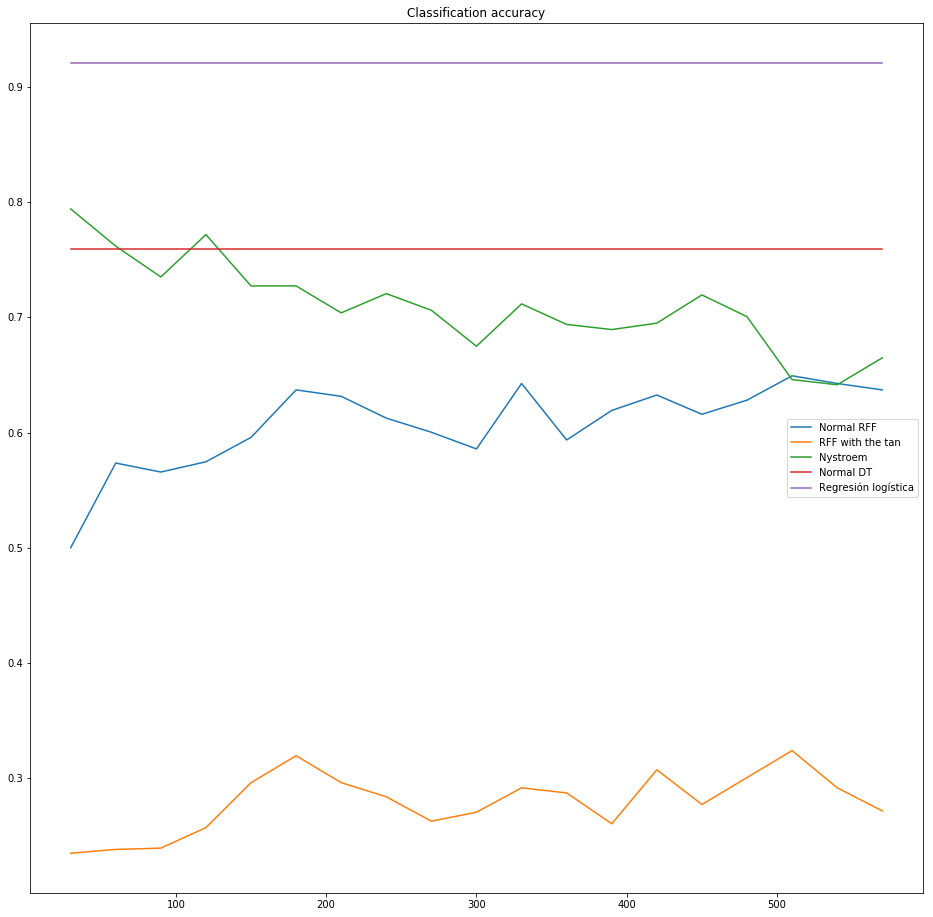

In [36]:
plt.figure(figsize=(16, 16))
accuracy = plt.subplot(111)
accuracy.plot(sample_sizes, normal_fourier_scores, label = "Normal RFF")
accuracy.plot(sample_sizes, tan_fourier_scores, label = "RFF with the tan")
accuracy.plot(sample_sizes, nystroem_scores, label = "Nystroem")

accuracy.plot([sample_sizes[0], sample_sizes[-1]],
              [test_score_nomal_dt, test_score_nomal_dt], label="Normal DT")
accuracy.plot([sample_sizes[0], sample_sizes[-1]],
              [test_score_logit, test_score_logit], label="Regresión logística")

accuracy.set_title("Classification accuracy")
accuracy.legend(loc='best')

# Conclusiones y observaciones

- Parece que regresión logística va mucho mejor que Decision Tree. Se supone que esto no debería ser así. Creo que esto es lo primero que hay que investigar, pues es el caso más simple y el que parece más contradictorio
- El tema de la tangente es un fracaso absoluto. Es totalmente aleatorio, y no generaliza nada, aunque sí que es capaz de memorizar
- Entre Nystroem y RFF parece que Nystroem es mejor, aunque tampoco despunta demasiado. Da la impresión que al incrementear la cantidad de features Nystroem va empeorando, y en cambio RFF va mejorando, pero no conozco los detalles de Nystroem y no sé si es lo normal
- La primera impresión es que no parece salir a cuenta hacer ningún tipo de resampling de los datos, con ninguno de los métodos